In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ga import ga, mutation_always, mutation_if
from string_search import GeneticAlgorithm

# Bit Strings


Mutatate if the new solution has a btter fit

In [2]:
l = 100
mu = 1 / l
solution, fits = ga(mutation_if, l, mu, 1500)

## Plots

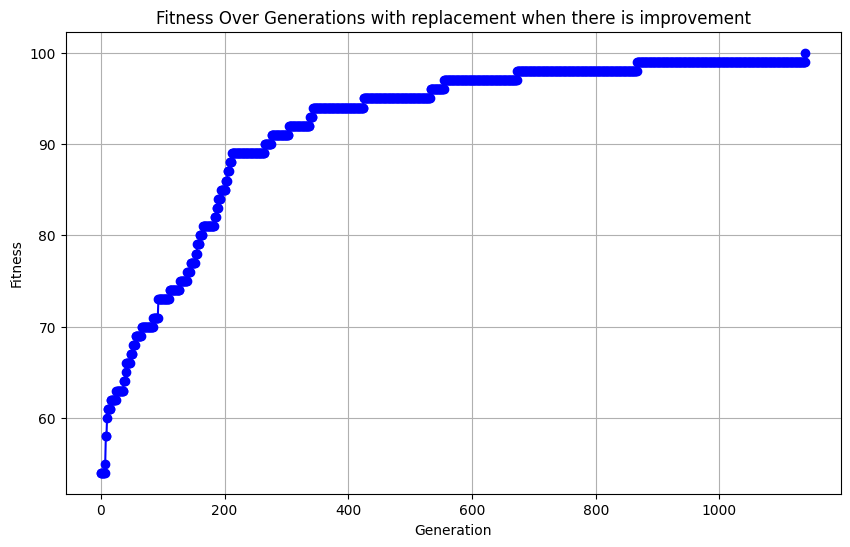

In [3]:
# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(len(fits)), fits, marker="o", linestyle="-", color="b")
plt.title("Fitness Over Generations with replacement when there is improvement")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

In [4]:
l = 100
mu = 1 / l
solution, fits = ga(mutation_always, l, mu, 1500)

Max generations reached without finding the solution!


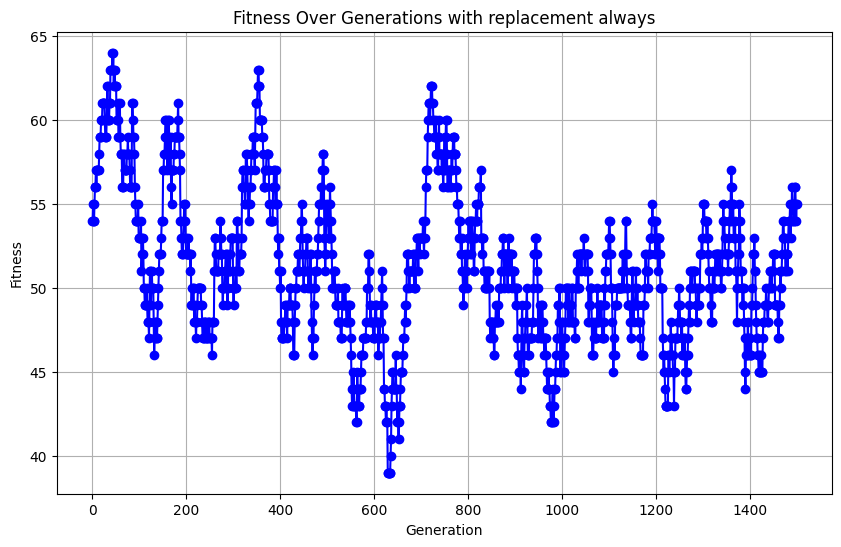

In [5]:
# Plotting the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(range(len(fits)), fits, marker="o", linestyle="-", color="b")
plt.title("Fitness Over Generations with replacement always")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached without finding the solution!
Max generations reached with

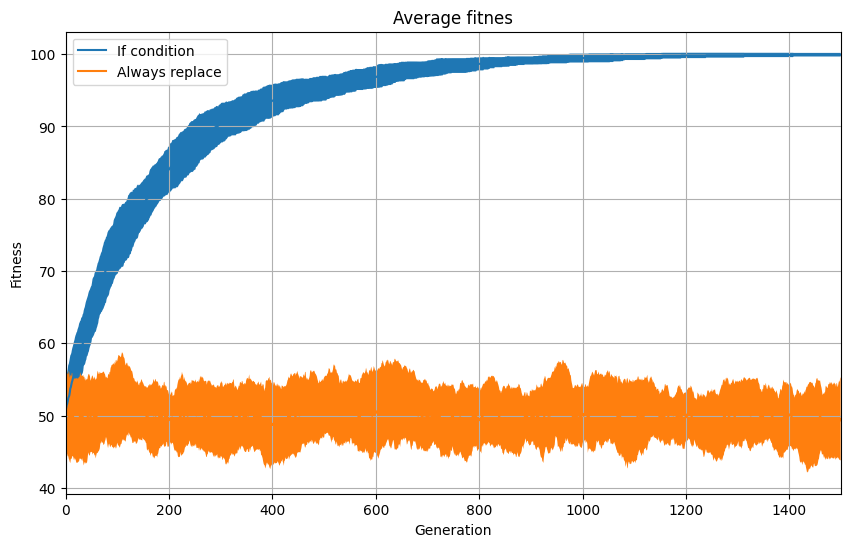

C:\Users\LDGer\AppData\Local\Temp\ipykernel_7760\312579192.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([final_if, final_always], labels=["If condition", "Always replace"])


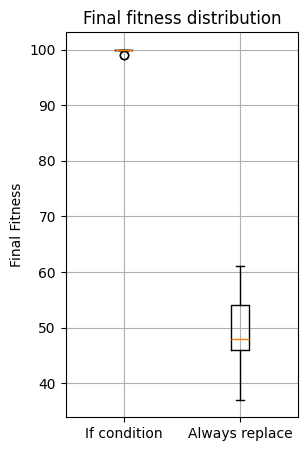

In [6]:
NUM_RUNS = 30
LENGTH = 100
MU = 1 / LENGTH
MAX_GENS = 1500

all_fits_if = []
all_fits_always = []

for run_index in range(NUM_RUNS):
    _, fits = ga(mutation_if, l=LENGTH, mu=MU, max_generations=MAX_GENS)
    if len(fits) < MAX_GENS: # need to pad it in case it finds a solution
        fits += [fits[-1]] * (MAX_GENS - len(fits))
    all_fits_if.append(fits)

for run_index in range(NUM_RUNS):
    _, fits = ga(mutation_always, l=LENGTH, mu=MU, max_generations=MAX_GENS)
    if len(fits) < MAX_GENS:
        fits += [fits[-1]] * (MAX_GENS - len(fits))
    all_fits_always.append(fits)

all_fits_if = np.array(all_fits_if)
all_fits_always = np.array(all_fits_always)

mean_if = np.mean(all_fits_if, axis=0)
std_if = np.std(all_fits_if, axis=0)

mean_always = np.mean(all_fits_always, axis=0)
std_always = np.std(all_fits_always, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(mean_if, label="If condition")
plt.fill_between(range(MAX_GENS), mean_if - std_if, mean_if + std_if)
plt.plot(mean_always, label="Always replace")
plt.fill_between(range(MAX_GENS), mean_always - std_always, mean_always + std_always)
plt.title("Average fitnes")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.xlim([0, MAX_GENS-1])
plt.legend()
plt.grid(True)
plt.show()

final_if = [run_fits[-1] for run_fits in all_fits_if]
final_always = [run_fits[-1] for run_fits in all_fits_always]
plt.figure(figsize=(8, 5))
plt.boxplot([final_if, final_always], labels=["If condition", "Always replace"])
plt.title("Final fitness distribution")
plt.ylabel("Final Fitness")
plt.grid(True)
plt.show()

# Genetic Algorithm with english letters

In [7]:
english_letters = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 
    'u', 'v', 'w', 'x', 'y', 'z', 
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z'
]

interval = 10
ga = GeneticAlgorithm(english_letters, "abcdefghijklmno", 15, 200, 0.06, 2, generations_to_analyse=interval)
res, final_generation = ga.run()
fits = ga.get_avg_fitness()
hamming_distances = ga.get_hamming_distances()

Target reached in 49 generations!


In [8]:
print(final_generation)

48


## Visualitations

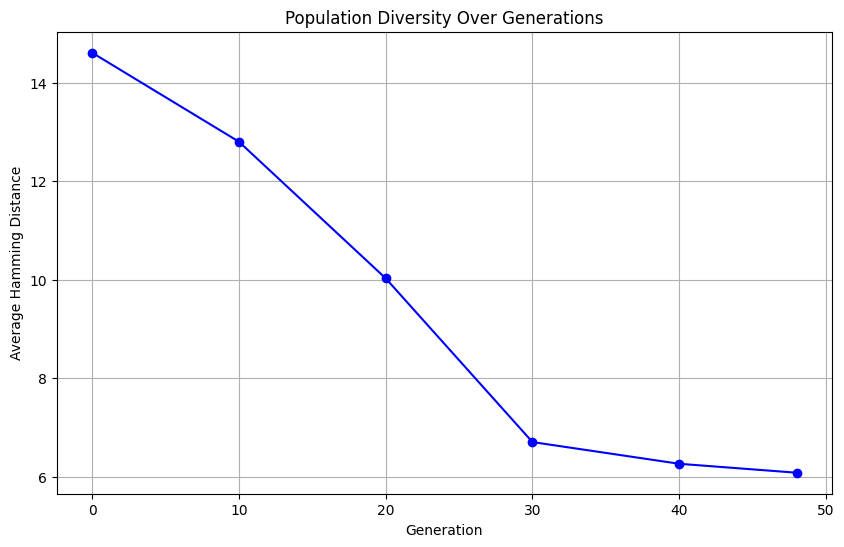

In [9]:
# Generate the list of generations where measurements were taken
generations = [i * interval for i in range(len(hamming_distances))]
generations[-1] = final_generation # the last measurement is always for the final generation

assert len(hamming_distances) == len(generations), "The lengths of hamming_distances and generations must match."

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(generations, hamming_distances, marker='o', linestyle='-', color='b')
plt.title('Population Diversity Over Generations')
plt.xlabel('Generation')
plt.ylabel('Average Hamming Distance')
plt.grid(True)
plt.show()